In [235]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/miniproj/Train.csv
/kaggle/input/miniproj/Test.csv


In [236]:
import pandas as pd 
import numpy as np                     # For mathematical calculations 
import seaborn as sns                  # For data visualization 
import matplotlib.pyplot as plt        # For plotting graphs 
%matplotlib inline 
import warnings   # To ignore any warnings 
warnings.filterwarnings("ignore")

In [237]:
train = pd.read_csv('../input/miniproj/Train.csv')
test = pd.read_csv('../input/miniproj/Test.csv')

In [238]:
train.shape,test.shape

((8523, 12), (5681, 11))

In [239]:
train_original=train.copy() 
test_original=test.copy()

In [240]:
train.info(),test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIn

(None, None)

In [241]:
train['source'] = 'train'
# test['source'] = 'test'
test['Item_Outlet_Sales'] = 0
data = pd.concat([train, test], sort = False)
print(train.shape, test.shape, data.shape)

(8523, 13) (5681, 12) (14204, 13)


In [242]:
data['Item_Outlet_Sales'].describe()

count    14204.000000
mean      1308.865489
std       1699.791423
min          0.000000
25%          0.000000
50%        559.272000
75%       2163.184200
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

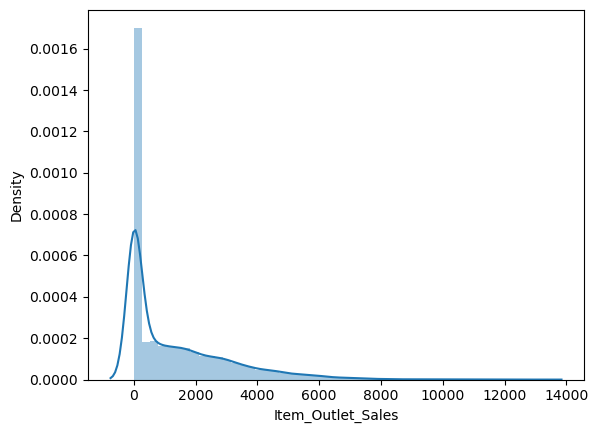

In [243]:
sns.distplot(data['Item_Outlet_Sales'])

In [244]:
print('Skewness: %f' % data['Item_Outlet_Sales'].skew())
print('Kurtsis: %f' %data['Item_Outlet_Sales'].kurt())

Skewness: 1.544684
Kurtsis: 2.419439


In [245]:
categorial_features = data.select_dtypes(include=[np.object])
categorial_features.head(2)

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,source
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1,train
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2,train


In [246]:
numerical_features = data.select_dtypes(include=[np.number])
numerical_features.head(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.30,0.016047,249.8092,1999,3735.1380
1,5.92,0.019278,48.2692,2009,443.4228


In [247]:
data['Outlet_Establishment_Year'].value_counts()

1985    2439
1987    1553
1999    1550
1997    1550
2004    1550
2002    1548
2009    1546
2007    1543
1998     925
Name: Outlet_Establishment_Year, dtype: int64

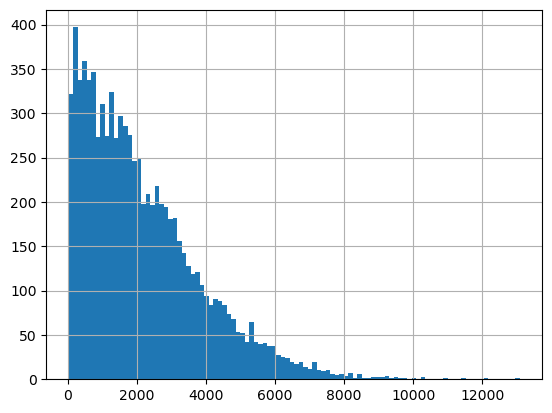

In [248]:
train['Item_Outlet_Sales'].hist(bins = 100);

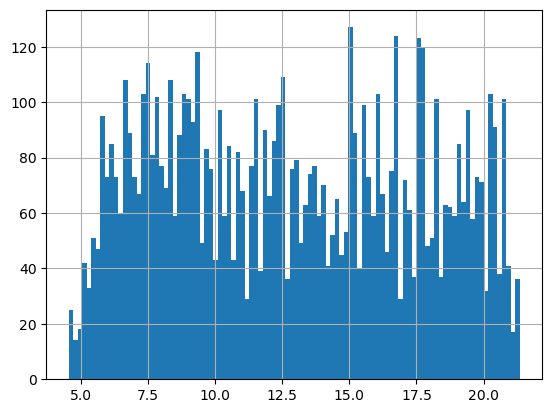

In [249]:
train['Item_Weight'].hist(bins = 100);

<AxesSubplot:>

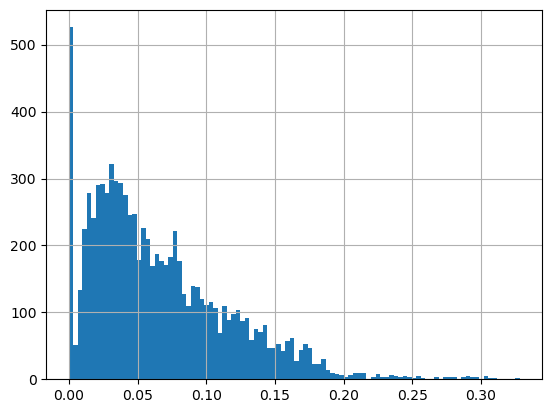

In [250]:
train['Item_Visibility'].hist(bins = 100)

<AxesSubplot:>

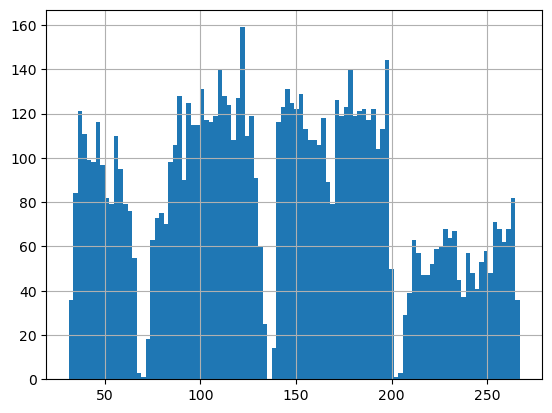

In [251]:
train['Item_MRP'].hist(bins = 100)

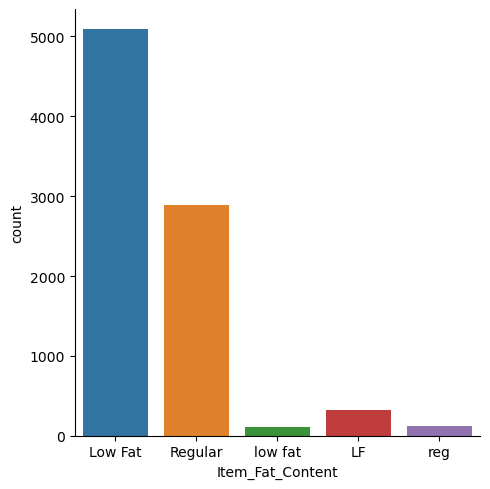

In [252]:
import seaborn as sns
sns.catplot(x="Item_Fat_Content", kind="count", data=train);

In [253]:
train['Item_Fat_Content'].replace({'reg':'Regular','low fat':'Low Fat','LF':'Low Fat'},inplace = True)

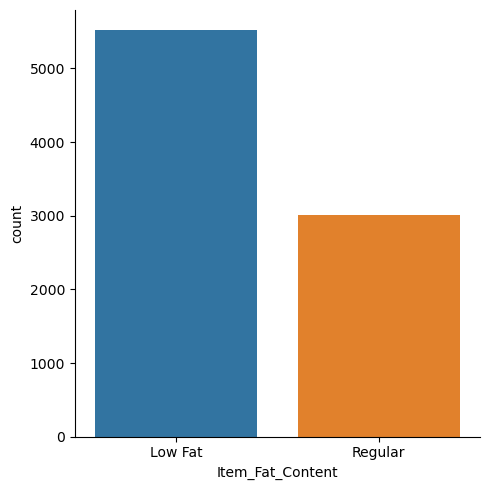

In [254]:
sns.catplot(x='Item_Fat_Content', kind='count', data=train)

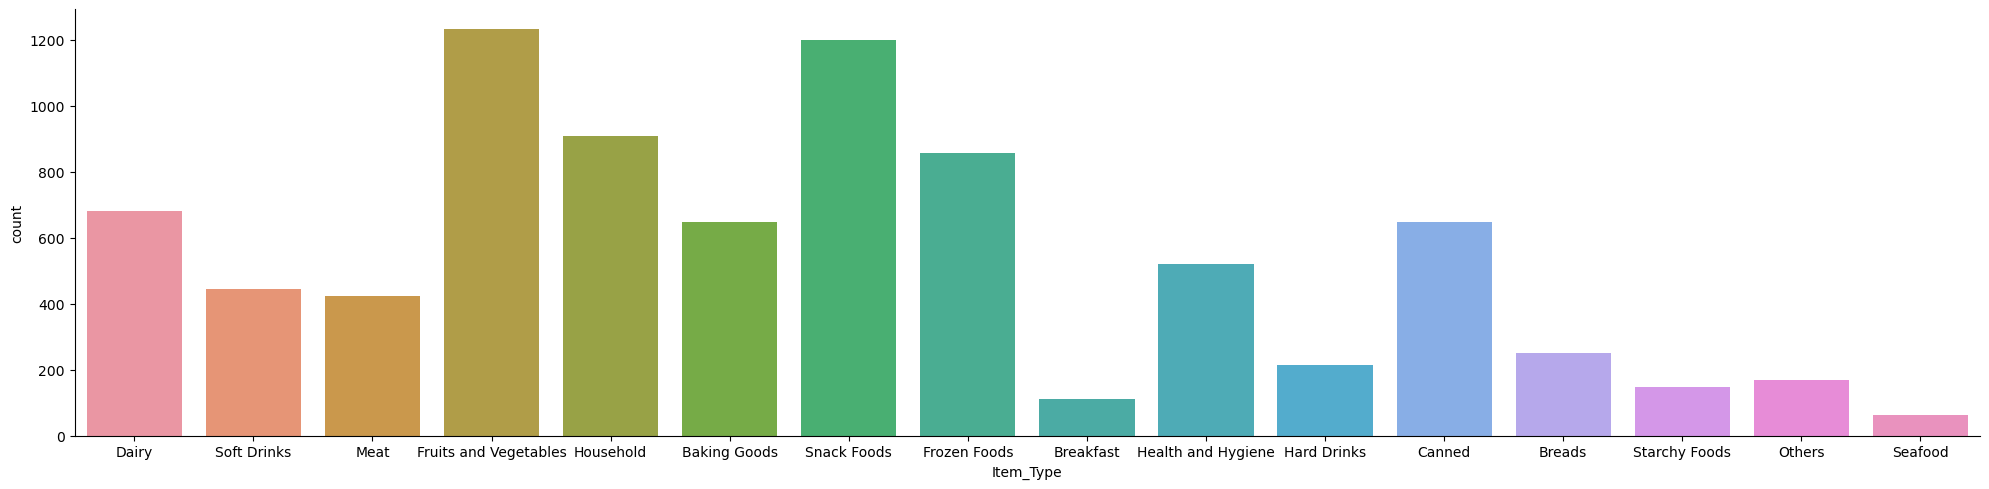

In [255]:
sns.catplot(x='Item_Type', kind='count', data=train, aspect=4)

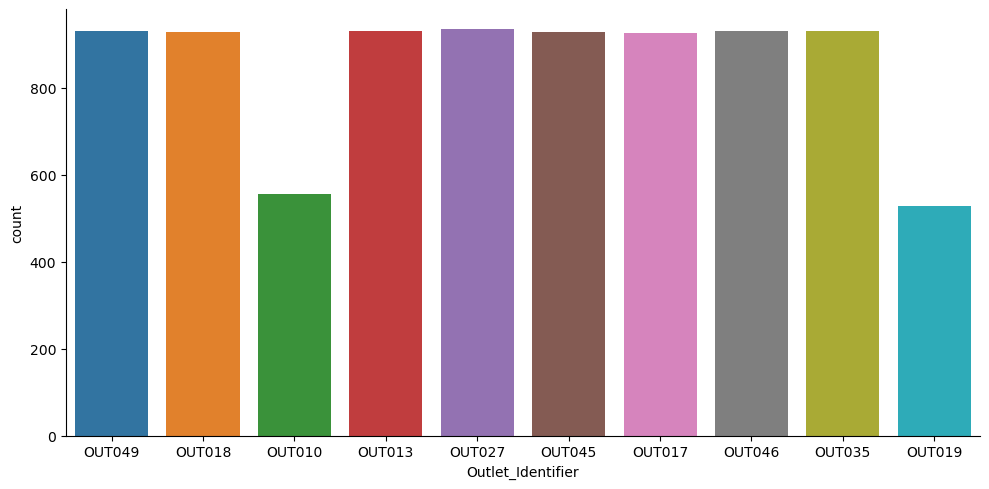

In [256]:
sns.catplot(x='Outlet_Identifier',kind = 'count',data = train,aspect = 2)

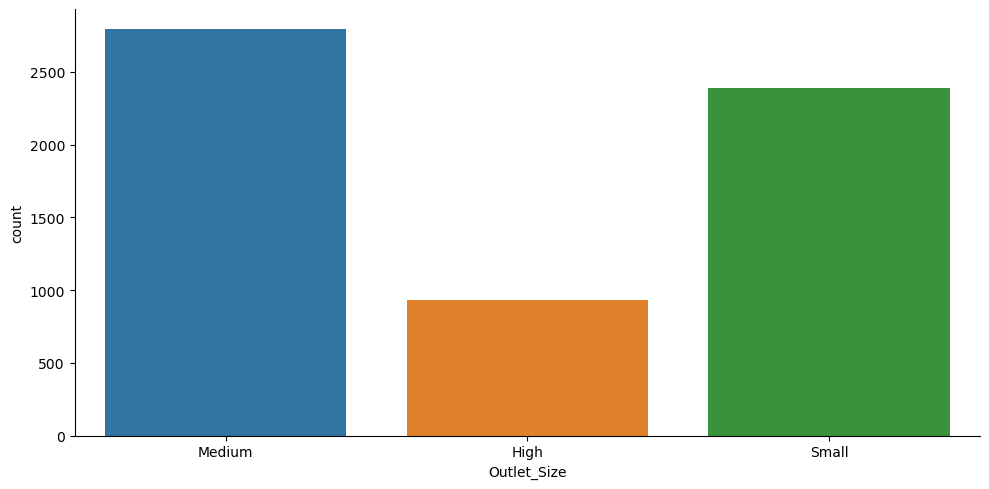

In [257]:
sns.catplot(x='Outlet_Size',kind = 'count',data = train,aspect = 2)

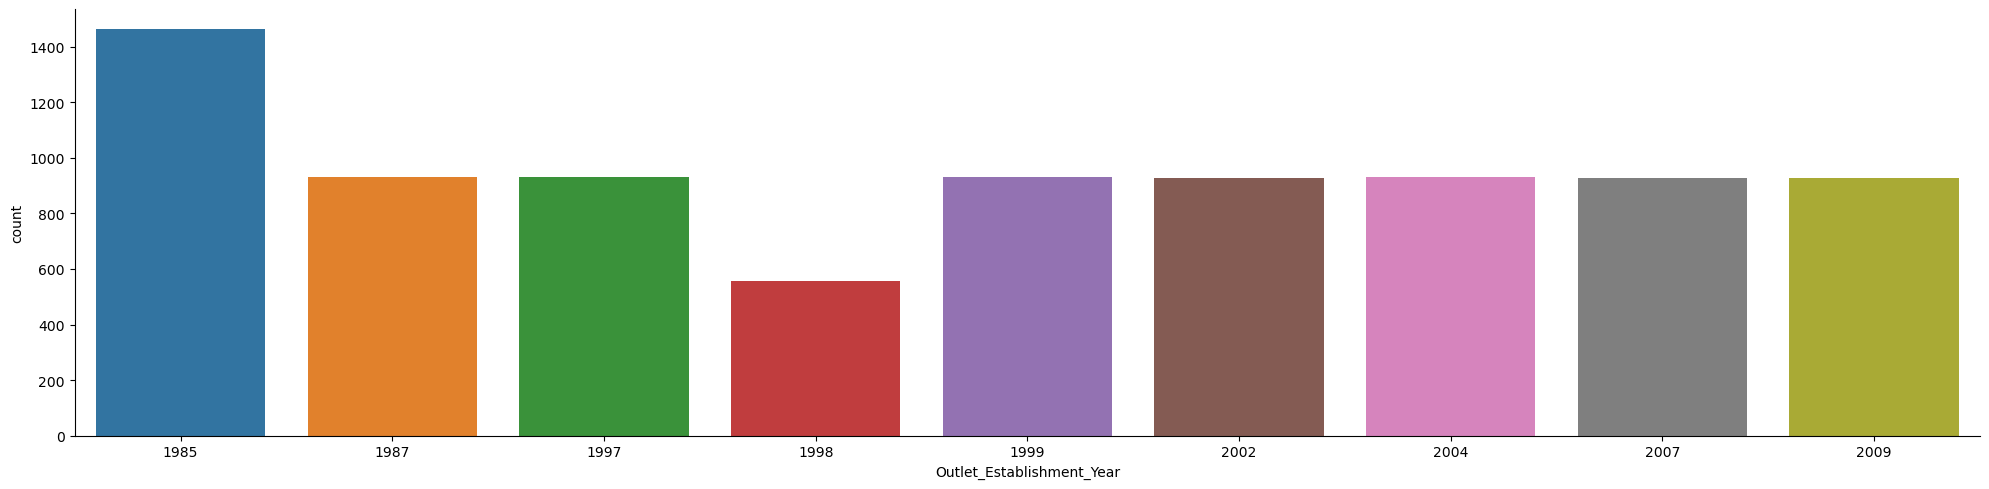

In [258]:
sns.catplot(x='Outlet_Establishment_Year',kind = 'count',data = train,aspect =4)

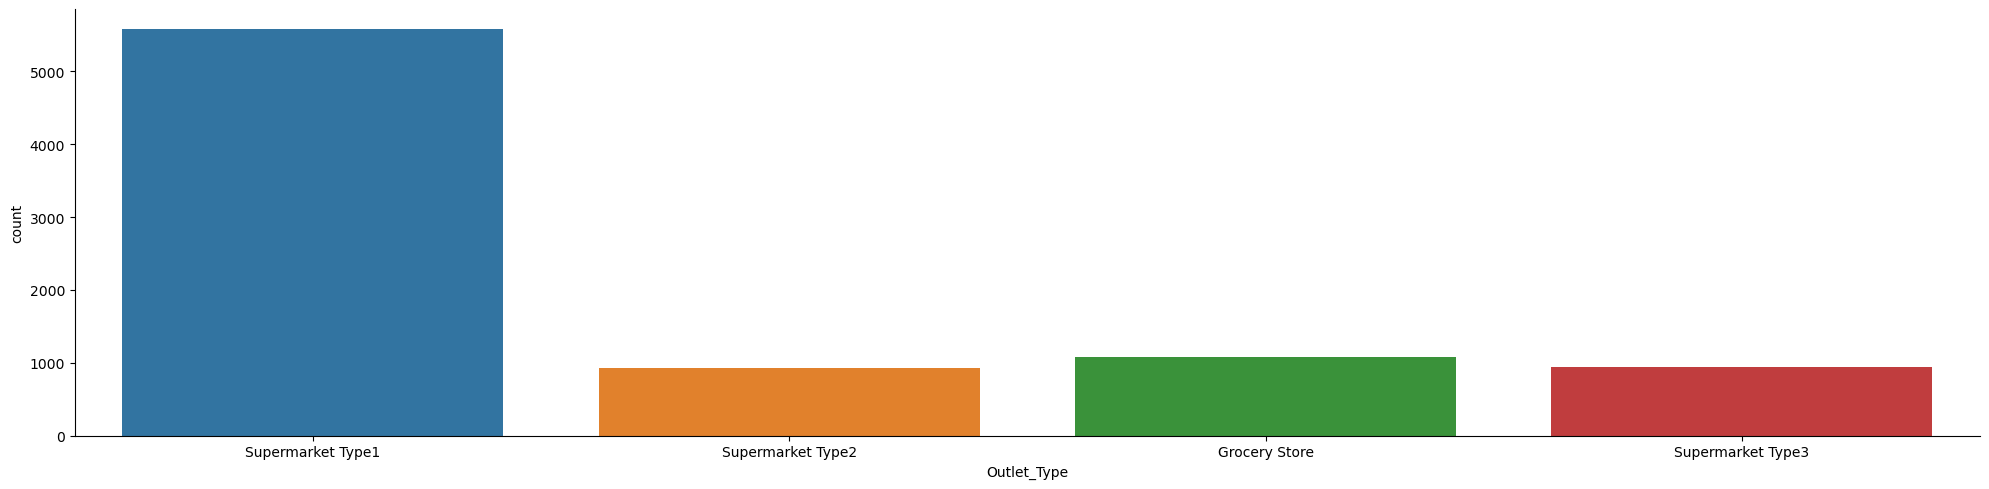

In [259]:
sns.catplot(x='Outlet_Type',kind = 'count',data = train,aspect =4)

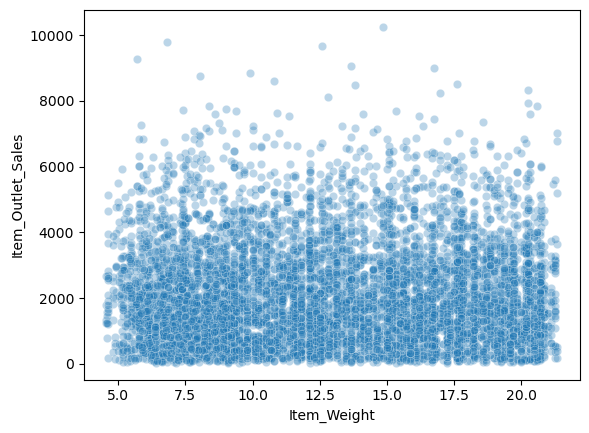

In [260]:
sns.scatterplot(x = 'Item_Weight',y = 'Item_Outlet_Sales',data = train,alpha = 0.3);

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Item_Visibility'>

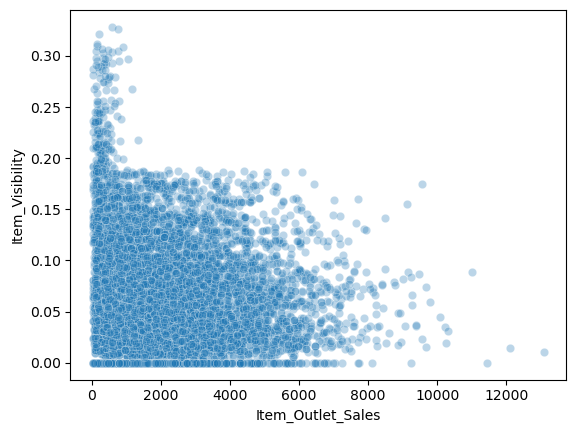

In [261]:
sns.scatterplot(x = 'Item_Outlet_Sales',y = 'Item_Visibility',data = train,alpha = 0.3)

<AxesSubplot:xlabel='Item_MRP', ylabel='Item_Outlet_Sales'>

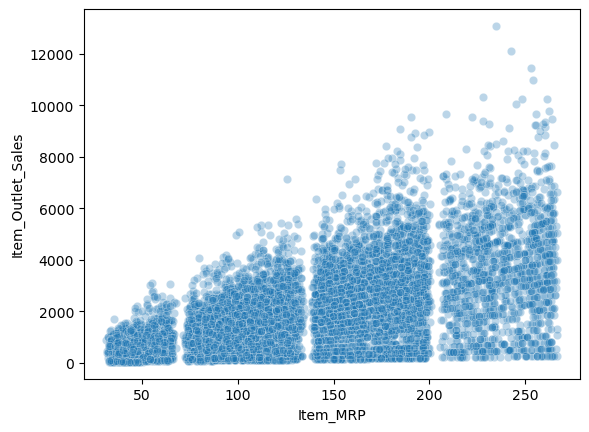

In [262]:
sns.scatterplot(x = 'Item_MRP',y = 'Item_Outlet_Sales',data = train,alpha = 0.3)

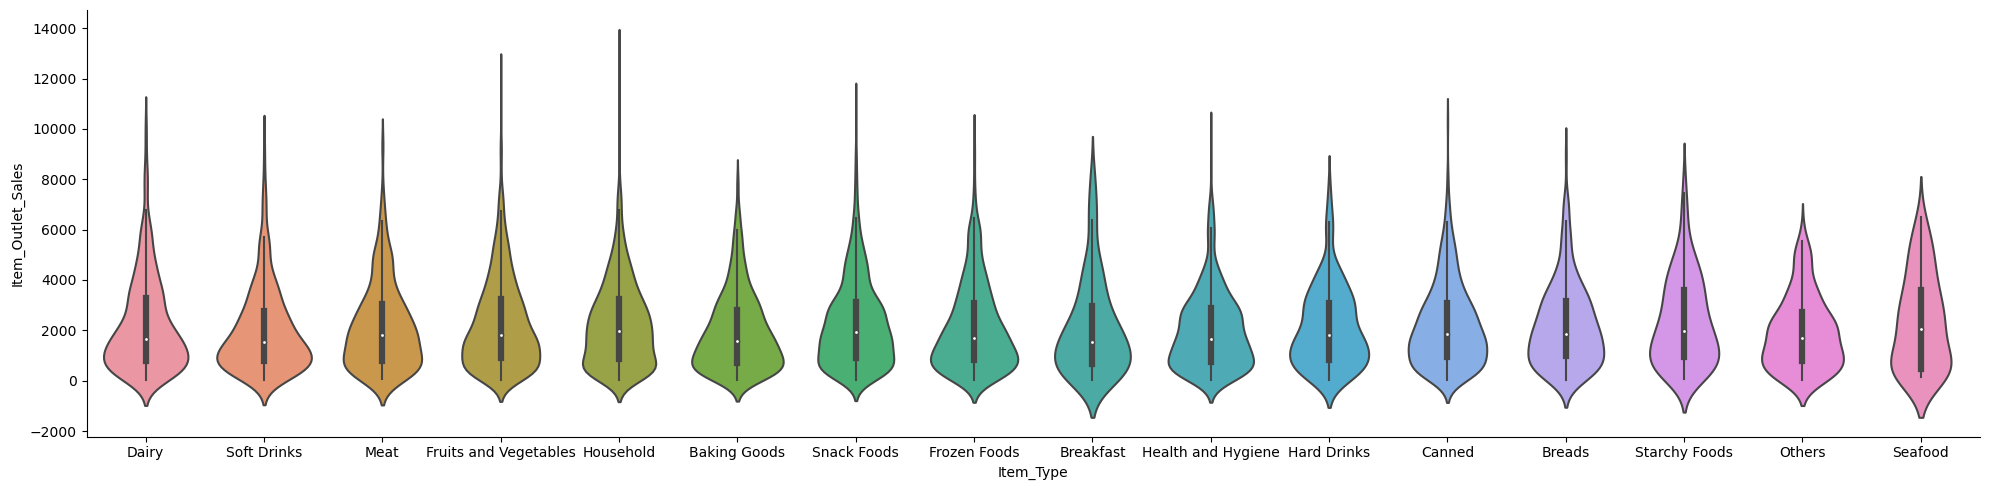

In [263]:
sns.catplot(x = 'Item_Type',y = 'Item_Outlet_Sales',kind = 'violin',data = train,aspect=4)

In [264]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  source                     8523 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage:

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='Item_Outlet_Sales'>

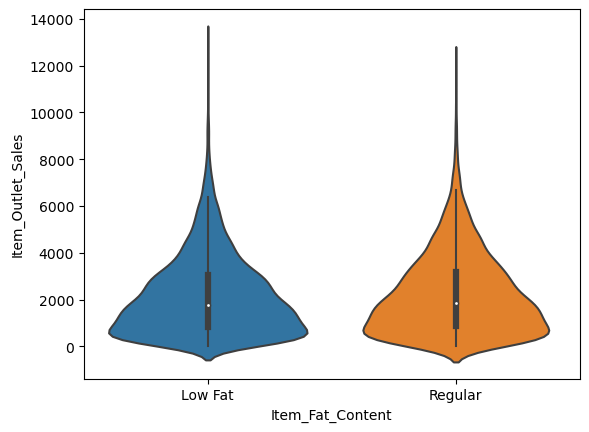

In [265]:
sns.violinplot(x = 'Item_Fat_Content',y = 'Item_Outlet_Sales',data = train)

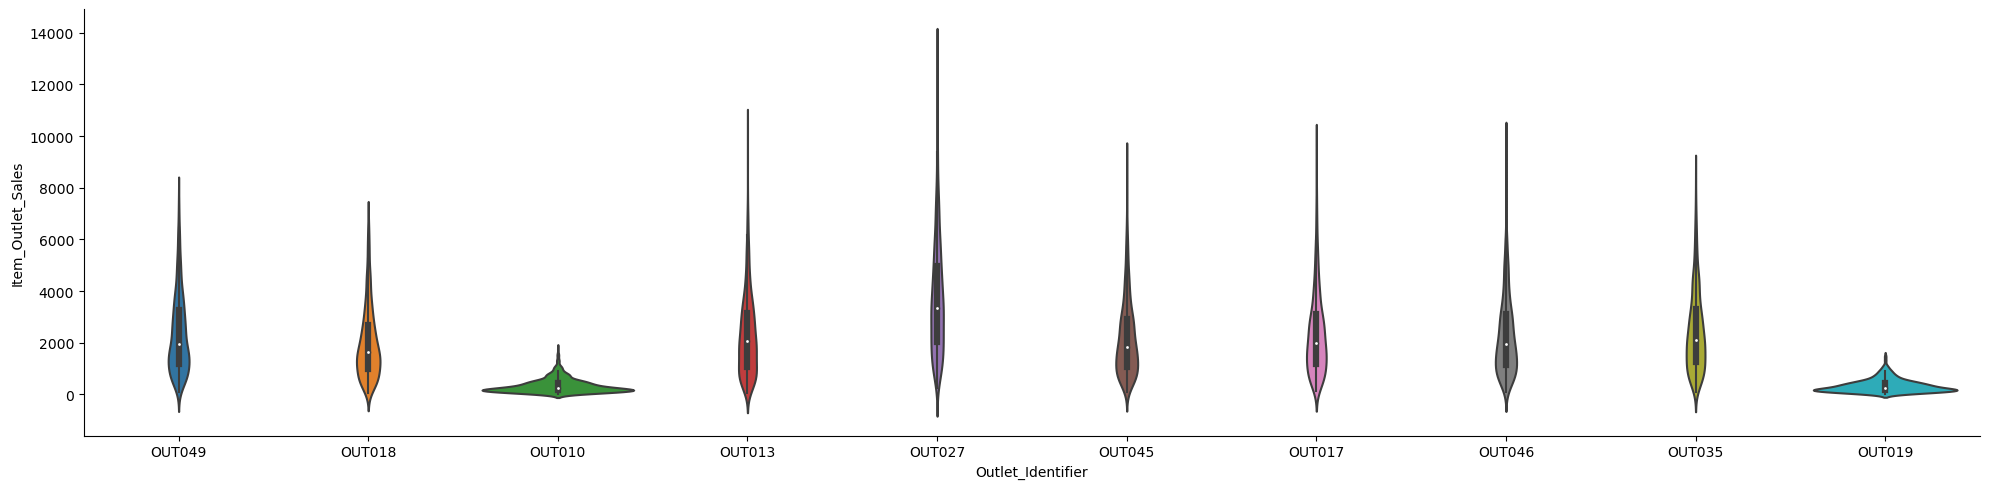

In [266]:
sns.catplot(x='Outlet_Identifier', y='Item_Outlet_Sales', kind='violin', data=train, aspect=4)

<AxesSubplot:xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>

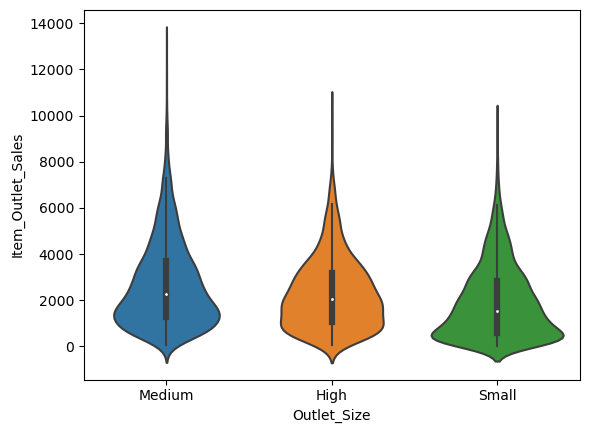

In [267]:
sns.violinplot(x='Outlet_Size', y='Item_Outlet_Sales', data=train)

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='Item_Outlet_Sales'>

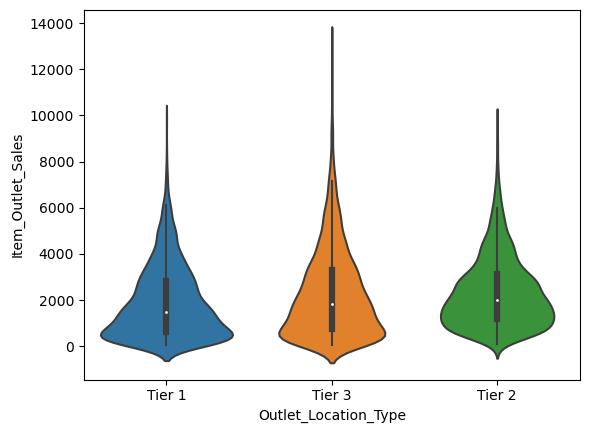

In [268]:
sns.violinplot(x='Outlet_Location_Type', y='Item_Outlet_Sales', data=train)

<AxesSubplot:xlabel='Outlet_Type', ylabel='Item_Outlet_Sales'>

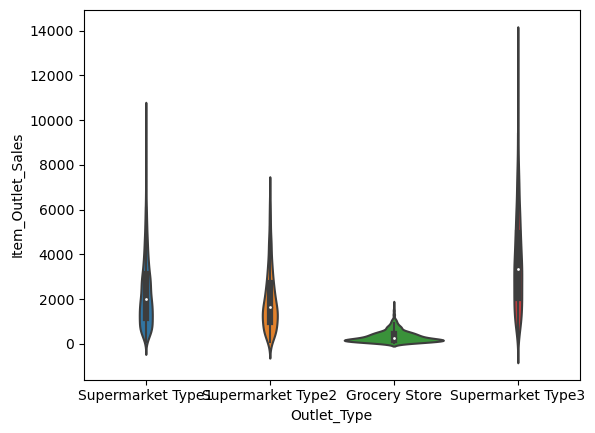

In [269]:
sns.violinplot(x='Outlet_Type',y='Item_Outlet_Sales',data = train)

In [270]:
train.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
source                          0
dtype: int64

In [271]:
from sklearn.preprocessing import LabelEncoder
l_enc  = LabelEncoder()
a = l_enc.fit_transform(train['Item_Identifier'])

In [272]:
a

array([ 156,    8,  662, ..., 1357,  681,   50])

In [273]:
train['Item_Weight'].fillna(a.mean(),inplace = True)

In [274]:
train.Item_Weight.isna().sum()


0

In [275]:
train['Outlet_Size'].fillna('Small',inplace  = True)

In [276]:
train['Outlet_Size'].isna().sum()

0

<AxesSubplot:ylabel='Frequency'>

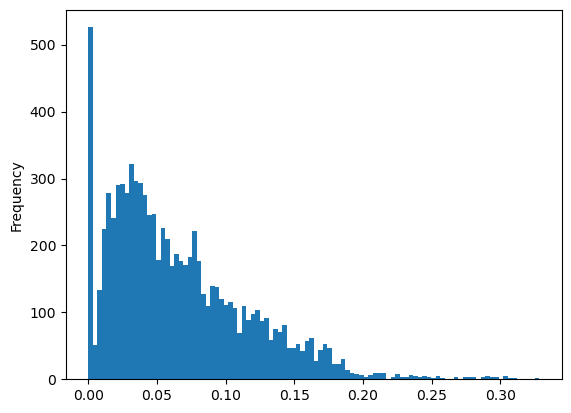

In [277]:
train['Item_Visibility'].plot(kind = 'hist',bins = 100)

In [278]:
train.shape

(8523, 13)

In [279]:
a= train[train['Item_Visibility']!=0]['Item_Visibility'].mean()

In [280]:
train['Item_Visibility'] = train['Item_Visibility'].replace(0.00,a)

<AxesSubplot:ylabel='Frequency'>

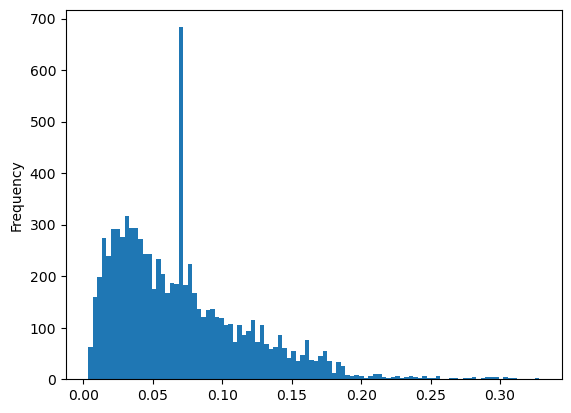

In [281]:
train['Item_Visibility'].plot(kind = 'hist',bins = 100)

In [282]:
perishable = ["Breads", "Breakfast", "Dairy", "Fruits and Vegetables", "Meat", "Seafood"]
non_perishable = ["Baking Goods", "Canned", "Frozen Foods", "Hard Drinks", "Health and Hygiene", "Household", "Soft Drinks"]

In [283]:
item_list =[] 
for i in train['Item_Type']:
    if i in perishable:
        item_list.append('perishable')
    elif (i in non_perishable):
        item_list.append('non_perishable')
    else:
        item_list.append('not_sure')
        
train['Item_Type_new'] = item_list

In [284]:
train['Item_Category'] =train['Item_Identifier'].replace({'^DR[A-Z]*[0-9]*':'DR','^FD[A-Z]*[0-9]*':'FD','^NC[A-Z]*[0-9]*':'NC'},regex = True)


In [285]:
Food=pd.crosstab(train['Item_Type'],train['Item_Category'])
Food

Item_Category,DR,FD,NC
Item_Type,,,
Baking Goods,0,648,0
Breads,0,251,0
Breakfast,0,110,0
Canned,0,649,0
Dairy,140,542,0
Frozen Foods,0,856,0
Fruits and Vegetables,0,1232,0
Hard Drinks,214,0,0
Health and Hygiene,0,0,520


In [286]:
train['Item_Fat_Content'][(train['Item_Category']=='NC')]='Non Edible'

In [287]:
train['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'Non Edible'], dtype=object)

In [288]:
train['Outlet_Years'] = 2019-train['Outlet_Establishment_Year']

In [289]:
train['Price_Per_Unit_Weight'] = train['Item_MRP']/train['Item_Weight']

In [290]:
def clusters(x):
    if x<69:
        return '1st'
    elif x in range(69,136):
        return '2nd'
    elif x in range(136,203):
        return '3rd'
    else:
        return '4th'
train['Item_MRP_Clusters'] = train['Item_MRP'].astype('int').apply(clusters)
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Item_Type_new,Item_Category,Outlet_Years,Price_Per_Unit_Weight,Item_MRP_Clusters
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,perishable,FD,20,26.861204,4th
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,non_perishable,DR,10,8.153581,1st
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train,perishable,FD,20,8.092457,3rd
3,FDX07,19.20,Regular,0.070482,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,train,perishable,FD,21,9.484115,3rd
4,NCD19,8.93,Non Edible,0.070482,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train,non_perishable,NC,32,6.031512,1st


In [291]:
train['Item_MRP_Clusters'].unique()

array(['4th', '1st', '3rd', '2nd'], dtype=object)

In [292]:
from sklearn.preprocessing import LabelEncoder

In [293]:
# a = ['Outlet_Size','Outlet_Location_Type']
le = LabelEncoder()
train['Outlet_Size']= le.fit_transform(train['Outlet_Size'])
train['Outlet_Location_Type'] = le.fit_transform(train['Outlet_Location_Type'])
train['Item_Fat_Content'] = le.fit_transform(train['Item_Fat_Content'])
train['Item_MRP_Clusters'] = le.fit_transform(train['Item_MRP_Clusters'])

In [294]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   int64  
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   int64  
 9   Outlet_Location_Type       8523 non-null   int64  
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  source                     8523 non-null   object 
 13  Item_Type_new              8523 non-null   objec

In [295]:
#train['Outlet_Identifier'].unique(),train['Item_Identifier'].unique(),train['Item_Type'].unique()
a = pd.get_dummies(train[['Item_Identifier','Item_Type','Outlet_Identifier','Outlet_Type','Item_Type_new','Item_Category']])
train = train.drop(['Item_Identifier','Item_Type','Outlet_Identifier','Outlet_Type','Item_Type_new','Item_Category','source'],axis = 1 )
train = pd.concat([train,a],axis = 1)

In [296]:
train['Price_Per_Unit_Weight'] = np.log(train['Price_Per_Unit_Weight'])
train['Item_Visibility'] = np.log(train['Item_Visibility'])

In [297]:
corr = train.corr()
corr

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Outlet_Years,Price_Per_Unit_Weight,...,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Type_new_non_perishable,Item_Type_new_not_sure,Item_Type_new_perishable,Item_Category_DR,Item_Category_FD,Item_Category_NC
Item_Weight,1.000000,-0.003317,0.066080,-0.008383,-0.697827,-0.061976,0.092652,0.080829,0.697827,-0.931502,...,0.319613,-0.626303,-0.159086,0.771038,-0.016239,0.001699,0.015956,-0.014775,0.010002,-0.000490
Item_Fat_Content,-0.003317,1.000000,0.022764,0.008594,0.001451,-0.000829,0.000958,0.015249,-0.001451,0.007066,...,0.000742,-0.001443,0.001810,-0.000399,-0.039354,-0.012913,0.052585,-0.257054,0.116740,0.057458
Item_Visibility,0.066080,0.022764,1.000000,-0.001259,-0.051790,0.074313,-0.018024,-0.097821,0.051790,-0.061003,...,0.220199,-0.113338,-0.021623,-0.040640,-0.042096,-0.003787,0.048058,-0.000217,0.071544,-0.082243
Item_MRP,-0.008383,0.008594,-0.001259,1.000000,0.005020,0.000872,0.000232,0.567574,-0.005020,0.301232,...,-0.004277,0.004885,0.003850,-0.006714,-0.056826,0.028963,0.037030,-0.051733,0.029315,0.004859
Outlet_Establishment_Year,-0.697827,0.001451,-0.051790,0.005020,1.000000,0.425534,-0.089216,-0.049135,-1.000000,0.649372,...,-0.281196,0.245070,0.466336,-0.538072,0.011359,0.005425,-0.016566,0.009441,-0.002312,-0.004385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Item_Type_new_not_sure,0.001699,-0.012913,-0.003787,0.028963,0.005425,0.000402,-0.004614,0.018100,-0.005425,0.003193,...,-0.006228,0.002164,0.003768,-0.000412,-0.463202,1.000000,-0.322369,-0.149661,0.175873,-0.090831
Item_Type_new_perishable,0.015956,0.052585,0.048058,0.037030,-0.016566,-0.007977,0.002475,0.024315,0.016566,-0.007846,...,0.015642,-0.015081,-0.000764,0.007042,-0.689617,-0.322369,1.000000,-0.102429,0.355441,-0.332921
Item_Category_DR,-0.014775,-0.257054,-0.000217,-0.051733,0.009441,0.003876,-0.005539,-0.034672,-0.009441,0.004486,...,-0.003055,0.011999,-0.003872,-0.011145,0.210390,-0.149661,-0.102429,1.000000,-0.514021,-0.154560
Item_Category_FD,0.010002,0.116740,0.071544,0.029315,-0.002312,-0.003544,-0.001713,0.031905,0.002312,0.002912,...,-0.005712,-0.003772,0.003433,0.008406,-0.467322,0.175873,0.355441,-0.514021,1.000000,-0.768023


In [298]:
from sklearn.linear_model import LinearRegression

In [299]:
X = train.drop('Item_Outlet_Sales',axis = 1)
y = train['Item_Outlet_Sales']

In [300]:
from sklearn.model_selection import train_test_split

In [301]:
X_train,X_valid,y_train,y_valid = train_test_split(X,y,random_state = 8)

In [302]:
print(X_train.shape,X_valid.shape,y_train.shape,y_valid.shape)

(6392, 1605) (2131, 1605) (6392,) (2131,)


In [303]:
X_train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Years,Price_Per_Unit_Weight,Item_MRP_Clusters,...,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Type_new_non_perishable,Item_Type_new_not_sure,Item_Type_new_perishable,Item_Category_DR,Item_Category_FD,Item_Category_NC
4325,13.00,0,-1.873283,79.6986,1997,2,0,22,1.813303,1,...,0,1,0,0,1,0,0,0,1,0
246,12.00,0,-3.382979,179.3976,1987,0,2,32,2.704698,2,...,0,1,0,0,1,0,0,0,1,0
22,14.60,1,-3.661337,196.5084,2004,2,1,15,2.599684,2,...,0,1,0,0,1,0,0,0,0,1
4612,15.50,2,-2.065209,262.1568,1998,2,2,21,2.828103,3,...,1,0,0,0,1,0,0,0,1,0
1894,15.35,0,-4.280608,62.7168,1999,1,0,20,1.407514,0,...,0,1,0,0,1,0,0,0,1,0


In [304]:
model = LinearRegression(normalize=True,fit_intercept= True)

In [305]:
model.fit(X,y)

LinearRegression(normalize=True)

In [306]:
y_pred = model.predict(X_valid)

In [307]:
model.score(X_train,y_train),model.score(X_valid,y_valid)

(0.6413862385598423, 0.645684584366305)

In [308]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [309]:
mean_squared_error(y_valid, y_pred),mean_absolute_error(y_valid, y_pred)

(1135888.54758676, 791.3083843266072)

In [310]:
from sklearn.model_selection import KFold, cross_val_score
from xgboost import XGBRegressor

my_model = XGBRegressor(n_estimators=1000, learning_rate=0.05)
my_model.fit(X_train,y_train)
predictions = my_model.predict(X_valid)

from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error : " + str(mean_absolute_error(y_valid,predictions)))

Mean Absolute Error : 806.2809339338097


In [311]:
from sklearn.linear_model import Lasso

In [312]:
ls = Lasso(alpha = 0.01)
ls.fit(X_train,y_train)


Lasso(alpha=0.01)

In [313]:
predictions = ls.predict(X_valid)

In [314]:
mean_absolute_error(y_valid,predictions)

988.7210479492622